In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('Social_Network_Ads.csv')

In [17]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
df['User ID'].nunique()

400

In [21]:
df.drop('User ID',axis=1,inplace=True)

In [22]:
df.groupby('Gender').describe().T

Gender                        Female           Male
Age             count     204.000000     196.000000
                mean       38.411765      36.867347
                std        10.859019      10.043636
                min        18.000000      18.000000
                25%        30.000000      29.000000
                50%        37.500000      36.500000
                75%        47.000000      42.000000
                max        60.000000      60.000000
EstimatedSalary count     204.000000     196.000000
                mean    71759.803922   67642.857143
                std     35595.236189   32421.819181
                min     15000.000000   15000.000000
                25%     44000.000000   43000.000000
                50%     70500.000000   68000.000000
                75%     90750.000000   86000.000000
                max    150000.000000  150000.000000
Purchased       count     204.000000     196.000000
                mean        0.377451       0.336735
                std         0.485942       0.473804
                min         0.000000       0.000000
                25%         0.000000       0.000000
                50%         0.000000       0.000000
                75%         1.000000       1.000000
                max         1.000000       1.000000

In [23]:
df.groupby(['Gender','Purchased']).describe().T

Gender                        Female                          Male  \
Purchased                          0              1              0   
Age             count     127.000000      77.000000     130.000000   
                mean       33.110236      47.155844      32.484615   
                std         8.468643       8.463645       7.504246   
                min        18.000000      27.000000      18.000000   
                25%        27.000000      42.000000      26.000000   
                50%        33.000000      48.000000      34.500000   
                75%        39.000000      53.000000      38.000000   
                max        59.000000      60.000000      49.000000   
EstimatedSalary count     127.000000      77.000000     130.000000   
                mean    61480.314961   88714.285714   59630.769231   
                std     25248.243816   43123.097103   23504.292355   
                min     15000.000000   20000.000000   15000.000000   
                25%     44000.000000   41000.000000   43500.000000   
                50%     62000.000000   96000.000000   60500.000000   
                75%     79000.000000  130000.000000   76750.000000   
                max    134000.000000  150000.000000  141000.000000   

Gender                                
Purchased                          1  
Age             count      66.000000  
                mean       45.500000  
                std         8.762244  
                min        28.000000  
                25%        39.000000  
                50%        46.000000  
                75%        50.500000  
                max        60.000000  
EstimatedSalary count      66.000000  
                mean    83424.242424  
                std     40937.122745  
                min     20000.000000  
                25%     41250.000000  
                50%     87500.000000  
                75%    117750.000000  
                max    150000.000000

In [24]:
df['Male']=pd.get_dummies(df['Gender'],drop_first=True)

In [25]:
df.head(3)

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0


In [26]:
df.drop('Gender',axis=1,inplace=True)

(array([19.,  9., 15., 22., 25., 21., 20., 15., 44., 33., 46., 19.,  9.,
        26., 24.,  7., 11.,  7.,  8., 20.]),
 array([18. , 20.1, 22.2, 24.3, 26.4, 28.5, 30.6, 32.7, 34.8, 36.9, 39. ,
        41.1, 43.2, 45.3, 47.4, 49.5, 51.6, 53.7, 55.8, 57.9, 60. ]),
 <a list of 20 Patch objects>)

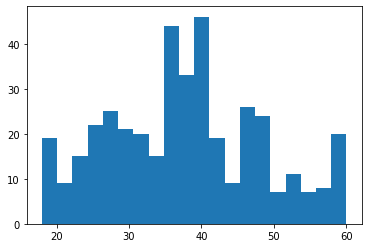

In [27]:
plt.hist(df['Age'],bins=20)

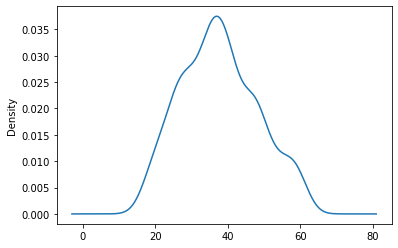

In [28]:
df['Age'].plot.kde()

(array([22., 29., 25., 14., 25., 33., 34., 16., 45., 37., 32.,  8.,  9.,
        13.,  9., 10.,  5., 12., 10., 12.]),
 array([ 15000.,  21750.,  28500.,  35250.,  42000.,  48750.,  55500.,
         62250.,  69000.,  75750.,  82500.,  89250.,  96000., 102750.,
        109500., 116250., 123000., 129750., 136500., 143250., 150000.]),
 <a list of 20 Patch objects>)

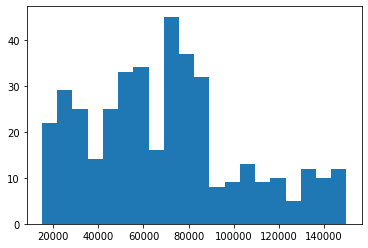

In [30]:
plt.hist(df['EstimatedSalary'],bins=20)

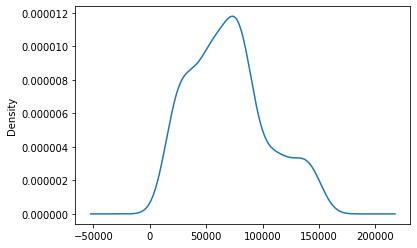

In [31]:
df['EstimatedSalary'].plot.kde()

Text(0.5, 1.0, 'Purchased')

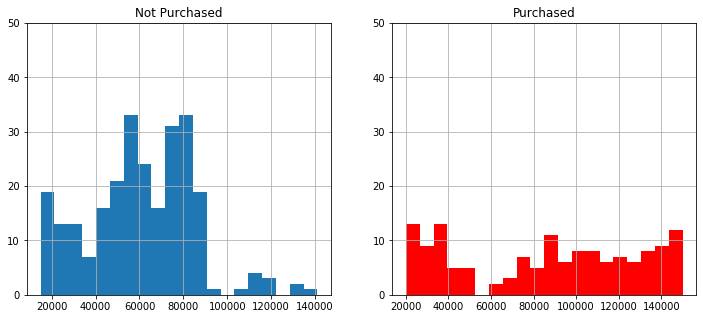

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
p=plt.hist(df[df['Purchased']==0]['EstimatedSalary'],bins=20)
plt.grid()
plt.ylim([0,50])
plt.title('Not Purchased')

plt.subplot(1,2,2)
p=plt.hist(df[df['Purchased']==1]['EstimatedSalary'],bins=20,color='r')
plt.grid()
plt.ylim([0,50])
plt.title('Purchased')

Text(0.5, 1.0, 'Purchased')

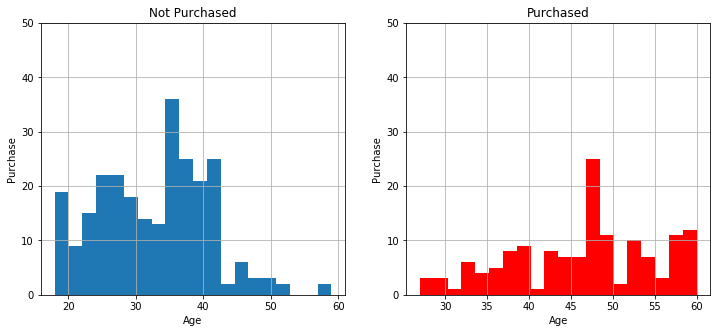

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
p=plt.hist(df[df['Purchased']==0]['Age'],bins=20)
plt.grid()
plt.ylim([0,50])
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('Not Purchased')

plt.subplot(1,2,2)
p=plt.hist(df[df['Purchased']==1]['Age'],bins=20,color='r')
plt.grid()
plt.ylim([0,50])
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('Purchased')

In [37]:
X = df.drop('Purchased',axis=1)
y = df['Purchased']

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20,random_state=101)

In [48]:
model_DT= DecisionTreeClassifier().fit(xtrain,ytrain)

In [49]:
model_DT.score(xtest,ytest)

0.9

In [50]:
model_RF = RandomForestClassifier().fit(xtrain,ytrain)

In [51]:
model_RF.score(xtest,ytest)

0.8875

In [53]:
model_DT.classes_           #Labels

array([0, 1], dtype=int64)

In [58]:
imp_DT = pd.DataFrame(model_DT.feature_importances_*100,index=X.columns,columns=['Feature Importance'])

In [59]:
imp_DT

,Feature Importance
Age,51.229447
EstimatedSalary,46.317641
Male,2.452913


In [61]:
X2 = X.drop('Male',axis=1).copy()
y2 = y.copy()
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(X2,y2,test_size=0.20,random_state=101)
model_DT2 = DecisionTreeClassifier().fit(xtrain2,ytrain2)
model_DT2.score(xtest2,ytest2)

0.9125